# Project on Tartu Smart Bike data analysis
## Introduction to Data Science - LTAT.02.002
## Analysis on bike rental data


## Table of Contents
1. [Data exploring](#exploring)  
    1.1. [Performing the exploration on the routes dataset from June](#exploring1)
2. [Data cleaning](#cleaning)  
    2.1. [Removing rows with missing and incorrect values in columns 'startstationname' and 'endstationname'](#cleaning1)  
    2.2. [Removing rides where start and end station are the same (and rides that are less than 100 m.)](#cleaning2)  
    2.3. [Correcting spelling differences in Membership column](#cleaning3)  
    2.4. [Converting 'unlockedat' and 'lockedat' from string to date](#cleaning4)  
    2.5. [Adding 'weekday' as a column to datasets](#cleaning5)  
    2.6. [Exporting cleaned datasets to csv](#cleaning6)  
    2.7. [Merging all 4 route datasets](#merging)  
3. [Data analysis](#analysis)  
    3.1. [Kõige populaarsemate jaamade leidmine](#analysis1)  
    3.2. [Loome uue andmestiku jaamade kohta](#analysis2)  
    3.3. [Liikmelisuse jaotus läbi kuude](#analysis3)  
    

## 1. Data exploring <a name="exploring"></a>
**Used data:**  Confidential Tartu Smart Bike rental and locations data (June 2019 - September 2019)

In [1]:
import pandas as pd
import numpy as np
# reading in data from csv-s
# csv files are in a folder named 'data_for_IDS2019_project_team_W17' 
# that's in the same folder as project root folder 'tartu-smart-bike'
data_routes_june = pd.read_csv("..\\data_for_IDS2019_project_team_W17\\bicycle_data\\routes_201906.csv",sep=',')
data_routes_july = pd.read_csv("..\\data_for_IDS2019_project_team_W17\\bicycle_data\\routes_201907.csv",sep=',')
data_routes_august = pd.read_csv("..\\data_for_IDS2019_project_team_W17\\bicycle_data\\routes_201908.csv",sep=',')
data_routes_september = pd.read_csv("..\\data_for_IDS2019_project_team_W17\\bicycle_data\\routes_201909.csv",sep=',')

datasets = [data_routes_june, data_routes_july, data_routes_august, data_routes_september]

### 1.1 Performing the exploration on the routes dataset from June <a name="exploring1"></a>

In [2]:
data_routes_june.dtypes

route_code            int64
cyclenumber           int64
unlockedat           object
unlockedattime       object
lockedat             object
lockedattime         object
startstationname     object
endstationname       object
rfidnumber           object
length              float64
DurationMinutes     float64
CycleType            object
costs                 int64
Membership           object
dtype: object

In [3]:
for column in data_routes_june.columns:
    print(data_routes_june[column].value_counts())
    print()

1560100206883    2
1560103709436    2
1560098082028    2
1560092928595    2
1560325697121    2
1560186500597    2
1560104282400    2
1560079811191    2
1560019239348    2
1560092040307    2
1560275782057    2
1560105841532    2
1560180777492    2
1559991888983    2
1560273041215    2
1560105323387    2
1560198431598    2
1560017348637    2
1560340586346    2
1560245671235    2
1560058276023    2
1560270771546    2
1560189102885    1
1560267703597    1
1560262561020    1
1560145037546    1
1560074676717    1
1560311929962    1
1560156638452    1
1560262016138    1
                ..
1560260667888    1
1560143223708    1
1560254328799    1
1560190980043    1
1560276572104    1
1560340794816    1
1560016398286    1
1560095305679    1
1560186673088    1
1559990069190    1
1560018120647    1
1559985487813    1
1560189571035    1
1560167948249    1
1560172406750    1
1560329435100    1
1560198430717    1
1560174247901    1
1560025781783    1
1560157867987    1
1560089716694    1
156001068437

In [4]:
# Missing values in the datasets are defined as '-- Määramata --' and 'Undetermined'
def missing_values(data):
    total_rows = len(data.index)
    for column in data.columns:
        total_missing = 0
        if type(data[column].loc[0]) == str:
            total_missing += data[column].str.contains('-- Määramata --').sum()
            total_missing += data[column].str.contains('Undetermined').sum()
        if total_missing > 0:
            print ('Number of missing values in column \'' + column + '\': ' + str(total_missing) )

In [5]:
for data in datasets:
    missing_values(data)
    print()

Number of missing values in column 'startstationname': 400
Number of missing values in column 'endstationname': 254

Number of missing values in column 'startstationname': 306
Number of missing values in column 'endstationname': 261

Number of missing values in column 'startstationname': 495
Number of missing values in column 'endstationname': 539

Number of missing values in column 'startstationname': 490
Number of missing values in column 'endstationname': 628



## 2. Data cleaning <a name="cleaning"></a>
### 2.1. Removing rows with missing and incorrect values in columns 'startstationname' and 'endstationname' <a name="cleaning1"></a>

In [6]:
def remove_missing_rows(data):
    # Missing values in the datasets are defined as '-- Määramata --' and 'Undetermined'
    indices = data[(data['startstationname'] == '-- Määramata --')].index
    data.drop(indices, inplace=True)
    indices = data[(data['startstationname'] == 'Undetermined')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == '-- Määramata --')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == 'Undetermined')].index
    data.drop(indices, inplace=True)
    
    # Stations 'Warehouse', 'Töökoda', "SPARK Demo" and 'Delta' are not publically usable
    indices = data[(data['startstationname'] == 'Warehouse')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == 'Warehouse')].index
    data.drop(indices, inplace=True)
    indices = data[(data['startstationname'] == 'Delta')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == 'Delta')].index
    data.drop(indices, inplace=True)
    indices = data[(data['startstationname'] == 'Töökoda')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == 'Töökoda')].index
    data.drop(indices, inplace=True)
    indices = data[(data['startstationname'] == 'SPARK Demo')].index
    data.drop(indices, inplace=True)
    indices = data[(data['endstationname'] == 'SPARK Demo')].index
    data.drop(indices, inplace=True)
    
    # Removing all rows where there are NaN values
    data.dropna(inplace=True)
    

In [7]:
for data in datasets:
    remove_missing_rows(data)

### 2.2. Removing rides where start and end station are the same (and rides that are less than 100 m.) <a name="cleaning2"></a>
These are the 'rides' where the bike is undocked and then re-docked into the same dock without riding the bike.   
Not sure if it's okay to remove less than 100m rides because it seems like at some rides the distance isn't measured at all but start and end station are different. Maybe these are the ones where the bikes are reallocated so that's why it doesn't show any distance travelled??

In [8]:
def remove_incorrect_rides(data):
    #indices = data[(data['length'] < 0.100)].index
    #data.drop(indices, inplace=True)
    indices = data[(data['startstationname'] == data['endstationname'])].index
    data.drop(indices, inplace=True)

In [9]:
for data in datasets:
    remove_incorrect_rides(data)

### 2.3. Correcting spelling differences in Membership column <a name="cleaning3"></a>

In [10]:
data_routes_june.Membership.value_counts()

3 month free membership            17867
3-Month Free Membership            14017
Free Membership (with bus card)     8281
1 month free membership             6679
1-month Free Membership             2530
1 Year Membership                      5
1 mo                                   1
Name: Membership, dtype: int64

In [11]:
def correct_spelling(data):
    data.Membership = data.Membership.replace(to_replace ="3 month free membership", value = "3-Month Free Membership")
    data.Membership = data.Membership.replace(to_replace ="1 DAY MEMBERSHIP", value = "1 Day Membership")
    data.Membership = data.Membership.replace(to_replace ="1 YEAR MEMBERSHIP", value = "1 Year Membership")
    data.Membership = data.Membership.replace(to_replace ="1 WEEK MEMBERSHIP", value = "1 Week Membership")
    data.Membership = data.Membership.replace(to_replace ="1 month free membership", value = "1-month Free Membership")
    data.drop(data[(data.Membership == 'Free M')].index, inplace=True)
    data.drop(data[(data.Membership == '1 mo')].index, inplace=True)

In [12]:
for data in datasets:
    correct_spelling(data)

In [13]:
data_routes_june.Membership.value_counts()

3-Month Free Membership            31884
1-month Free Membership             9209
Free Membership (with bus card)     8281
1 Year Membership                      5
Name: Membership, dtype: int64

### 2.4. Converting 'unlockedat' and 'lockedat' from string to date <a name="cleaning4"></a>

In [14]:
import datetime
def string_to_date(data):
    data.unlockedat = pd.to_datetime(data.unlockedat, format="%Y-%m-%d")
    data.lockedat = pd.to_datetime(data.lockedat, format="%Y-%m-%d")

In [15]:
for data in datasets:
    string_to_date(data)

### 2.5. Adding 'weekday' as a column to datasets <a name="cleaning5"></a>
Weekday is based on unlocking date

In [16]:
def add_weekday(data):
    data.insert(2,"weekday",data['unlockedat'].dt.day_name())

In [17]:
for data in datasets:
    add_weekday(data)

In [18]:
data_routes_september.weekday.value_counts()

Wednesday    9392
Monday       9068
Tuesday      8932
Sunday       7803
Thursday     6473
Friday       4783
Saturday     3817
Name: weekday, dtype: int64

### 2.6. Exporting cleaned datasets to csv <a name="cleaning6"></a>
Cleaned data will be outside of project root directory because the data is confidential. You must have directory named "Cleaned data" on the same level as project root folder.

In [19]:
data_routes_june.to_csv(path_or_buf="..\\Cleaned data\\routes_2019_06_clean.csv",index=False)
data_routes_july.to_csv(path_or_buf="..\\Cleaned data\\routes_2019_07_clean.csv",index=False)
data_routes_august.to_csv(path_or_buf="..\\Cleaned data\\routes_2019_08_clean.csv",index=False)
data_routes_september.to_csv(path_or_buf="..\\Cleaned data\\routes_2019_09_clean.csv",index=False)

### 2.7. Merging all 4 routes datasets <a name="merging"></a>

In [20]:
for data in datasets:
    print(data.shape)

(49379, 15)
(51917, 15)
(51106, 15)
(50268, 15)


In [21]:
routes_data = pd.concat(datasets)
routes_data.shape

(202670, 15)

## 3. Data analysis <a name="analysis"></a>
TODO: 
Stuff

### 3.1. Kõige populaarsemate jaamade leidmine <a name="analysis1"></a>
Vaadata rentimisi ja tagastamisi `doki` kohta, siis saab jaama suurusest sõltumatu populaarsuse.   
Jaamade dokkide arvu peab kusagilt saama, praegu saab teha ainult rentimised ja tagastamised `jaama` kohta, ehk see mis ka ratas.tartu.ee lehel olemas on.

In [22]:
pd.set_option('display.max_rows', 500)

# iga jaama kohta, kui palju rentimisi 
rentimised_jaama_kohta = routes_data.startstationname.value_counts()
print(rentimised_jaama_kohta)
print()

# iga jaama kohta, kui palju tagastamisi
tagastamised_jaama_kohta = routes_data.endstationname.value_counts()
print(tagastamised_jaama_kohta)

Uueturu                 11964
Soola                    7940
Eeden                    6172
Pirogovi plats           5941
Vabadussild              4735
Aleksandri               4667
Lõunakeskus              4624
Turusild                 4403
Veeriku                  4346
Annelinna keskus         4202
Anne saun                4071
Raudteejaam              4034
Rahu                     3959
Magistri                 3929
Annelinna kiir           3865
Aparaaditehas            3764
Tarmeko                  3705
Roosi                    3672
Riiamäe                  3647
Annelinn                 3632
Kaunase puiestee         3506
Kalda tee                3360
Raatuse kool             3205
Sõpruse sild             3133
Pargi                    3110
Vanemuise park           3025
Sõbra                    2969
Näituse                  2955
Papli                    2944
Kuu                      2900
Raatuse                  2896
Karete                   2882
AHHAA                    2862
Põhja puie

### 3.2. Loome uue andmestiku jaamade kohta <a name="analysis2"></a>

In [23]:
jaamad = pd.DataFrame()
jaamad['Nimi'] = rentimised_jaama_kohta.index
jaamad['Rentimised'] = rentimised_jaama_kohta.values
jaamad['Tagastamised'] = ""
for i in range(len(jaamad.Nimi)):
    jaamad['Tagastamised'].iloc[i] = tagastamised_jaama_kohta.get(jaamad.Nimi.iloc[i])
jaamad

C:\Users\Mikko\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Nimi,Rentimised,Tagastamised
0,Uueturu,11964,11938
1,Soola,7940,8004
2,Eeden,6172,6091
3,Pirogovi plats,5941,6057
4,Vabadussild,4735,4746
5,Aleksandri,4667,4730
6,Lõunakeskus,4624,4727
7,Turusild,4403,4361
8,Veeriku,4346,4185
9,Annelinna keskus,4202,4268


### 3.3. Liikmelisuse jaotus läbi kuude <a name="analysis3"></a>
Parima ülevaate saab, kui jaotada liikmelisus kolmeks nii: 
1. Free memberships
2. With bus card
3. Paid memberships

In [24]:
def new_membership_value(row):
    if row['Membership'] == "3-Month Free Membership" or row['Membership'] == "1-month Free Membership":
        return "Free memberships"
    if row['Membership'] == "Free Membership (with bus card)":
        return "With bus card"
    else:
        return "Paid memberships"

def add_column_liikmelisus(data):
    #lisan uue tulbana Liikmelisuse
    data['Liikmelisus'] = data.apply (lambda row: new_membership_value(row), axis=1)
    

In [25]:
# lisan tulba 'Liikmelisus' iga kuu andmestikku
for data in datasets:
    add_column_liikmelisus(data)

# panen uuesti 4 kuu andmed kokku
routes_data = pd.concat(datasets)
routes_data.shape

(202670, 16)

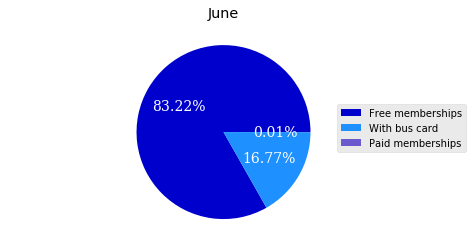

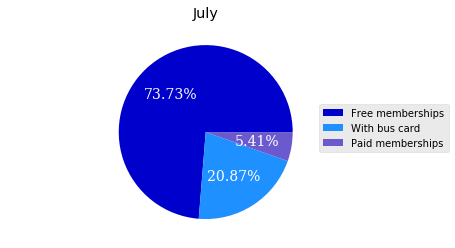

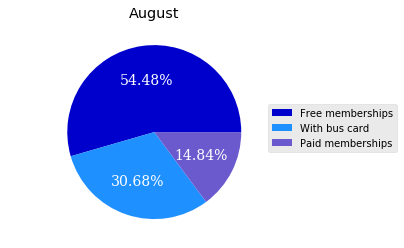

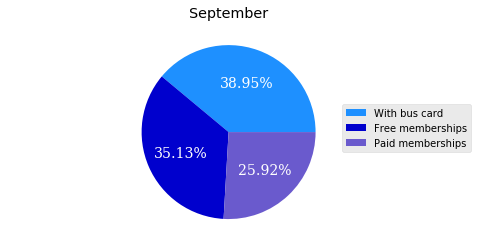

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")  # Default plot style
months = ["June", "July", "August", "September"]
for i in range(len(datasets)):
    counts = datasets[i]['Liikmelisus'].value_counts(normalize=True)
    colors = ["mediumblue", "dodgerblue", "slateblue"]
    if counts.index[0] == 'With bus card':
        colors = ["dodgerblue", "mediumblue", "slateblue"]
    plt.pie(counts, labels=counts.index, colors = colors,
        autopct="%1.2f%%", textprops={"name":"sans", "family":"serif", "weight":"normal", 'color':"w", "size":"14"})
    plt.title(months[i])
    plt.legend(bbox_to_anchor=(1, 0.65))
    plt.show()


### Converting 'unlockedattime' and 'lockedattime' from string to time
Makes it possible to compare times

In [27]:
def string_to_time(data):
    data['unlockedattime'] = pd.to_timedelta(data['unlockedattime'])
    data['lockedattime'] = pd.to_timedelta(data['lockedattime'])

In [28]:
for data in datasets:
    string_to_time(data)

In [29]:
data_routes_june.unlockedattime.iloc[0] > data_routes_june.unlockedattime.iloc[1]

False

## Frequent pattern mining
Ei leia vist midagi kasulikku 

In [31]:
data_stripped = routes_data.drop(columns = ['route_code','cyclenumber','unlockedat','unlockedattime','lockedat',
                            'lockedattime', 'costs', 'rfidnumber','Membership',
                            'length','DurationMinutes'])
data_stripped.head()

,weekday,startstationname,endstationname,CycleType,Liikmelisus
5,Monday,Pirogovi plats,Lossi,Pedelec,Free memberships
10,Monday,Lossi,Tulbi,Pedelec,Free memberships
18,Thursday,Tamme gümnaasium,Tähtvere spordipark,Pedelec,With bus card
19,Thursday,Tamme gümnaasium,Tähtvere spordipark,Pedelec,With bus card
20,Thursday,Raatuse,Sõpruse sild,Bike,Free memberships


In [32]:
values = data_stripped.values
values

array([['Monday', 'Pirogovi plats', 'Lossi', 'Pedelec',
        'Free memberships'],
       ['Monday', 'Lossi', 'Tulbi', 'Pedelec', 'Free memberships'],
       ['Thursday', 'Tamme gümnaasium', 'Tähtvere spordipark', 'Pedelec',
        'With bus card'],
       ...,
       ['Thursday', 'Vanemuise park', 'Vabadussild', 'Pedelec',
        'With bus card'],
       ['Thursday', 'Raatuse', 'Vanemuise park', 'Pedelec',
        'With bus card'],
       ['Thursday', 'Raja', 'Maarjamõisa', 'Pedelec', 'Paid memberships']],
      dtype=object)

In [33]:
import apyori

def rules_to_df(rules):
    results = list(rules)
    apriori_df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

    Support =[]
    Confidence = []
    Lift = []
    Items = []
    Antecedent = []
    Consequent=[]

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(RelationRecord.items)
            Antecedent.append(ordered_stat.items_base)
            Consequent.append(ordered_stat.items_add)
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    apriori_df['Items'] = list(map(set, Items))                                   
    apriori_df['Antecedent'] = list(map(set, Antecedent))
    apriori_df['Consequent'] = list(map(set, Consequent))
    apriori_df['Support'] = Support
    apriori_df['Confidence'] = Confidence
    apriori_df['Lift']= Lift
    return apriori_df

rules = apyori.apriori(values, min_support = 0.05, min_confidence = 0.5)
ap_df = rules_to_df(rules)
ap_df.sort_values(by=['Lift'],ascending=False)

,Items,Antecedent,Consequent,Support,Confidence,Lift
29,"{Sunday, Pedelec, Free memberships}","{Sunday, Pedelec}",{Free memberships},0.084492,0.683757,1.109725
8,"{Sunday, Free memberships}",{Sunday},{Free memberships},0.108368,0.682674,1.107969
7,"{Saturday, Free memberships}",{Saturday},{Free memberships},0.072394,0.661348,1.073356
27,"{Saturday, Pedelec, Free memberships}","{Saturday, Pedelec}",{Free memberships},0.057182,0.654894,1.062881
13,"{Pedelec, Friday}",{Friday},{Pedelec},0.079963,0.806229,1.041537
16,"{Saturday, Pedelec}",{Saturday},{Pedelec},0.087314,0.797656,1.030462
4,"{Monday, Free memberships}",{Monday},{Free memberships},0.128243,0.634174,1.029254
2,"{Bike, Free memberships}",{Bike},{Free memberships},0.143055,0.633201,1.027674
23,"{With bus card, Pedelec}",{With bus card},{Pedelec},0.212592,0.792459,1.023748
25,"{Monday, Pedelec, Free memberships}","{Monday, Pedelec}",{Free memberships},0.095426,0.628800,1.020532


### Heatmap: Length of rides based on weekday and starting station

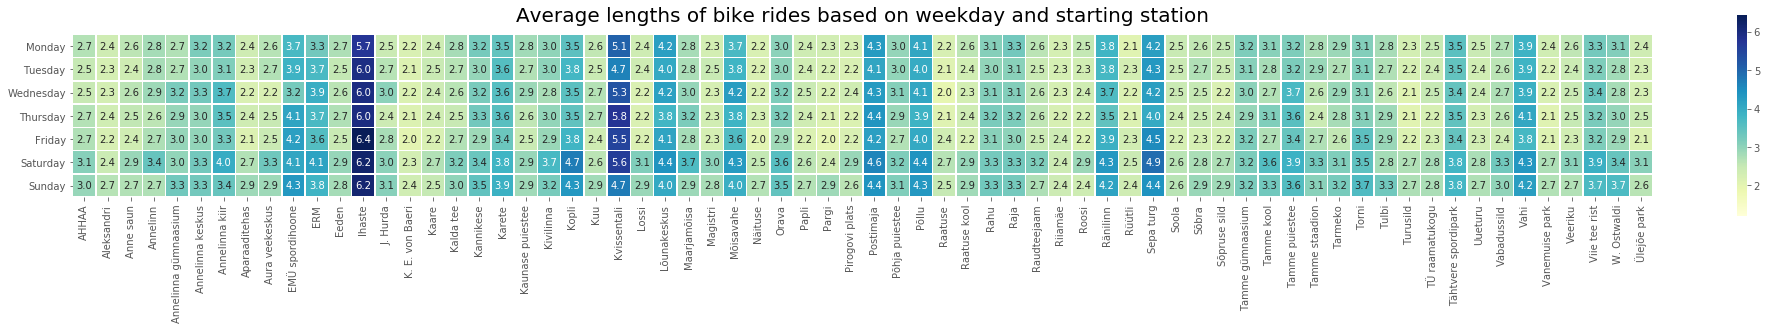

In [53]:
# TODO
import seaborn as sns
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
routes_data.weekday = pd.Categorical(routes_data.weekday,categories=weekdays)
routes_data = routes_data.sort_values('weekday')
crosstab_df = pd.crosstab(routes_data.weekday, routes_data.startstationname, values=routes_data.length, aggfunc='mean').round(2)
#crosstab_df
plt.subplots(figsize=(30,15))
sns.heatmap(crosstab_df, vmin=1.2, annot=True, square=True, linewidth=0.5, fmt='.1f', 
            cbar=True, cbar_kws={'fraction':0.006}, cmap='YlGnBu')
plt.title("Average lengths of bike rides based on weekday and starting station", {'fontsize':20}, pad = 13)
plt.xlabel("")
plt.ylabel("")
plt.savefig('heatmap.pdf')